# Compute forcing of historical and rcp data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filedir1 = '/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Data/CMIP5_globalaverages/Forcingpaperdata'
storedata = False # store anomalies in file?
storeforcingdata = False
createnewfile = False # if it is the first time this is run, new files should be created, that can later be loaded

rcpexp = 'rcp85'

filenameT = 'annualTanom_historical_and_' + rcpexp + '.txt'
filenameN = 'annualNanom_historical_and_' + rcpexp + '.txt'
filenameFF = 'historical_and_' + rcpexp + '_forcing_F13method.txt'
filenameNF = 'historical_and_' + rcpexp + '_forcing_estimates.txt'

# create file first time code is run:
if createnewfile == True:
    cols = ['year','ACCESS1-0','ACCESS1-3','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GFDL-ESM2G','GFDL-ESM2M','GISS-E2-H','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','IPSL-CM5B-LR','MIROC-ESM','MIROC5','MPI-ESM-LR','MPI-ESM-MR','MRI-CGCM3','NorESM1-M']
    dfT = pd.DataFrame(np.full((251, len(cols)),'-'), columns = cols); dfT['year'] = np.arange(1850,2100+1)
    dfN = pd.DataFrame(np.full((251, len(cols)),'-'), columns = cols); dfN['year'] = np.arange(1850,2100+1)
    dfT.to_csv(filenameT, sep='\t'); dfN.to_csv(filenameN, sep='\t');
    dfFF = pd.DataFrame(np.full((251, len(cols)),'-'), columns = cols); dfFF['year'] = np.arange(1850,2100+1)
    dfNF = pd.DataFrame(np.full((251, len(cols)),'-'), columns = cols); dfNF['year'] = np.arange(1850,2100+1)
    dfFF.to_csv(filenameFF, sep='\t'); dfNF.to_csv(filenameNF, sep='\t');


#model = 'ACCESS1-0' # available: rcp8.5 rcp4.5
#model = 'ACCESS1-3' # available: rcp8.5 rcp4.5
#model = 'CanESM2' # available: rcp8.5 rcp4.5 rcp2.6
#model = 'CCSM4' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'CNRM-CM5' # available: rcp8.5 rcp4.5 rcp2.6
#model = 'CSIRO-Mk3-6-0' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'GFDL-CM3' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'GFDL-ESM2G' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'GFDL-ESM2M' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'GISS-E2-H' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'GISS-E2-R' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'HadGEM2-ES' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'inmcm4' # available: rcp8.5 rcp4.5
#model = 'IPSL-CM5A-LR' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'IPSL-CM5B-LR' # available: rcp8.5 rcp4.5
#model = 'MIROC-ESM' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'MIROC5' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
#model = 'MPI-ESM-LR' # available: rcp8.5 rcp4.5 rcp2.6
#model = 'MPI-ESM-MR' # available: rcp8.5 rcp4.5 rcp2.6
#model = 'MRI-CGCM3' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6
model = 'NorESM1-M' # available: rcp8.5 rcp6.0 rcp4.5 rcp2.6


realm = 'Amon'
ensemble = 'r1i1p1'


## define time periods of data:
## note that many models have several rcp time periods

if model == 'ACCESS1-0':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '030001-079912'
    rcptimeperiod = '200601-210012' #rcp45, rcp85
    # rcp26 and rcp60 not available
    control_branch_yr = 300
elif model == 'ACCESS1-3':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '025001-074912'
    rcptimeperiod = '200601-210012' #rcp45, rcp85
    # rcp26 and rcp60 not available
    control_branch_yr = 250
elif model == 'CanESM2':
    historicaltimeperiod = '185001-200512'  
    controltimeperiod = '201501-301012'    
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp85
    #rcptimeperiod = '200601-230012' #rcp26, rcp45
    #rcp60 not available
    control_branch_yr = 2321
elif model == 'CCSM4':
    historicaltimeperiod = '185001-200512'  
    controltimeperiod = '025001-130012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    #rcptimeperiod = '200601-230012' #rcp26, rcp60, rcp85
    #rcptimeperiod = '200601-229912' #rcp45
    control_branch_yr = 937
elif model == 'CNRM-CM5':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '185001-269912'
    if rcpexp == 'rcp26':
        rcptimeperiod = '200601-210012' #rcp26
    else:
        rcptimeperiod = '200601-230012' #rcp45, rcp85
    #rcp60 not available
    control_branch_yr = 2250
elif model == 'CSIRO-Mk3-6-0':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '000101-050012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    control_branch_yr = 81
elif model == 'GFDL-CM3':
    historicaltimeperiod = '186001-200512'
    controltimeperiod = '000101-050012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    control_branch_yr = 1
elif model == 'GFDL-ESM2G' or model == 'GFDL-ESM2M':         
    historicaltimeperiod = '186101-200512'
    controltimeperiod = '000101-050012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    control_branch_yr = 162
elif model == 'GISS-E2-H':
    historicaltimeperiod = '185001-200512' 
    print(model + 'has control run for two different periods')
    #controltimeperiod = '118001-141912'
    controltimeperiod = '241001-294912'
    if rcpexp == 'rcp60':
        rcptimeperiod = '200601-210012' #rcp60
    else:
        rcptimeperiod = '200601-230012' #rcp26, rcp45, rcp85
    control_branch_yr = 2410
elif model == 'GISS-E2-R':
    historicaltimeperiod = '185001-200512'   
    print(model + ' has two different control runs')
    #controltimeperiod = '333101-363012'   
    controltimeperiod1 = '398101-453012' 
    controltimeperiod2 = '398101-920512'
    if rcpexp == 'rcp60':
        rcptimeperiod = '200601-210012' #rcp60
    else:
        rcptimeperiod = '200601-230012' #rcp26, rcp45, rcp85
    control_branch_yr = 3981
    # Note: The two blocks of years that are present (3331-3630 and 3981-4530) represent different control runs
elif model == 'HadGEM2-ES':
    historicaltimeperiod = '186001-200511'         
    controltimeperiod = '186001-243511'
    if rcpexp == 'rcp60':
        rcptimeperiod = '200601-209911' #rcp60
    else:
        rcptimeperiod = '200601-229912' #rcp26, rcp45, rcp85
    control_branch_yr = 1860 # or actually december 1859, but I ignore this first month is the annual average 
elif model == 'inmcm4': #  the time-coordinate units should read "days after 1851"
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '185001-234912'   
    rcptimeperiod = '200601-210012' # rcp45, rcp85
    #rcp26 and rcp60 not available
    control_branch_yr = 1850
elif model == 'IPSL-CM5A-LR':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '180001-279912'
    if rcpexp == 'rcp60':
        rcptimeperiod = '200601-210012' #rcp60
    else:
        rcptimeperiod = '200601-230012' #rcp26, rcp45, rcp85
    control_branch_yr = 1850
elif model == 'IPSL-CM5B-LR':
    historicaltimeperiod = '185001-200512'     
    controltimeperiod = '183001-212912'   
    rcptimeperiod = '200601-210012' #rcp45, rcp85
    #rcp26 and rcp60 not available   
    control_branch_yr = 1850
elif model == 'MIROC-ESM':
    historicaltimeperiod = '185001-200512'     
    controltimeperiod = '180001-242912'  
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    #rcptimeperiod = '200601-230012' #rcp45
    control_branch_yr = 1880
elif model == 'MIROC5':
    historicaltimeperiod = '185001-201212'     
    controltimeperiod = '200001-286912'    
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    control_branch_yr = 2411
elif model == 'MPI-ESM-LR':
    historicaltimeperiod = '185001-200512'     
    controltimeperiod = '185001-284912'    
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp85
    #rcptimeperiod = '200601-230012' #rcp26, rcp45, rcp85
    # rcp60 not available
    control_branch_yr = 1880
elif model == 'MPI-ESM-MR':
    historicaltimeperiod = '185001-200512'     
    controltimeperiod = '185001-284912'   
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp85
    # rcp60 not available
    control_branch_yr = 1850
elif model == 'MRI-CGCM3':
    historicaltimeperiod = '185001-200512'     
    controltimeperiod = '185101-235012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    control_branch_yr = 1950
elif model == 'NorESM1-M':
    historicaltimeperiod = '185001-200512' 
    controltimeperiod = '070001-120012'
    rcptimeperiod = '200601-210012' #rcp26, rcp45, rcp60, rcp85
    #rcptimeperiod = '200601-230012' #rcp45
    control_branch_yr = 700
    
    

In [2]:
######  load historical data ###### 
exp = 'historical'
#make historicaltimeperiod equal to '185001-200512' 

var = 'tas' # temperatures
strings = [var, realm, model, exp, ensemble, historicaltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
temp=datatable.iloc[:,0]

var = 'rlut' # rlut
strings = [var, realm, model, exp, ensemble, historicaltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rlut=datatable.iloc[:,0]

var = 'rsut' # rsut
strings = [var, realm, model, exp, ensemble, historicaltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rsut=datatable.iloc[:,0]

var = 'rsdt' # rsdt
strings = [var, realm, model, exp, ensemble, historicaltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rsdt=datatable.iloc[:,0]

if len(temp)>156:
    temp = temp[0:156]
    rlut = rlut[0:156]
    rsut = rsut[0:156]
    rsdt = rsdt[0:156]


###### load rcp data ######
if rcpexp == 'rcp85':
    exp = 'rcp85'
elif rcpexp == 'rcp60':
    exp = 'rcp60'
elif rcpexp == 'rcp45':
    exp = 'rcp45'
elif rcpexp == 'rcp26':
    exp = 'rcp26'

#make rcptimeperiod equal to = '200601-210012'

var = 'tas' # temperatures
strings = [var, realm, model, exp, ensemble, rcptimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rcptemp=datatable.iloc[0:95,0]

var = 'rlut' # rlut
strings = [var, realm, model, exp, ensemble, rcptimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rcprlut=datatable.iloc[0:95,0]

var = 'rsut' # rsut
strings = [var, realm, model, exp, ensemble, rcptimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rcprsut=datatable.iloc[0:95,0]

var = 'rsdt' # rsdt
strings = [var, realm, model, exp, ensemble, rcptimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rcprsdt=datatable.iloc[0:95,0]

###### load control run data ###### 
exp = 'piControl'

var = 'tas' # temperatures
if model == 'GISS-E2-R': 
    #controltimeperiod = controltimeperiod1
    controltimeperiod = controltimeperiod2
    
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controltemp=datatable.iloc[:,0]

var = 'rlut' # rlut
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrlut=datatable.iloc[0:len(controltemp),0]

var = 'rsut' # rsut
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrsut=datatable.iloc[0:len(controltemp),0]

var = 'rsdt' # rsdt
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrsdt=datatable.iloc[0:len(controltemp),0]

###### combine historical and rcp data ###### 

temp = temp.append(rcptemp[:,])
rlut = rlut.append(rcprlut[:,])
rsut = rsut.append(rcprsut[:,])
rsdt = rsdt.append(rcprsdt[:,])


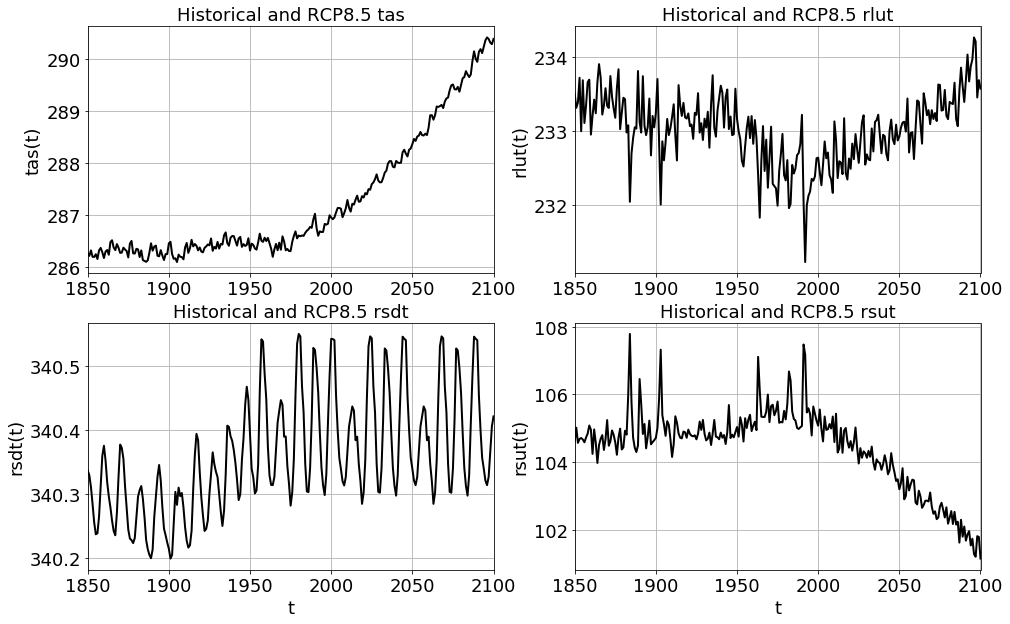

In [3]:
years = np.arange(int(historicaltimeperiod[0:4]),2100+1)

# plot historical and rcp8.5 data
if rcpexp == 'rcp85':
    exps = 'Historical and RCP8.5 '
elif rcpexp == 'rcp60':
    exps = 'Historical and RCP6.0 '
    if model == 'HadGEM2-ES':
        years = np.arange(int(historicaltimeperiod[0:4]),2100) # for hadgem rcp60
elif rcpexp == 'rcp45':
    exps = 'Historical and RCP4.5 '
elif rcpexp == 'rcp26':
    exps = 'Historical and RCP2.6 '

# create figure
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = [16,10])

# plot temperature
var = temp[:]; label = 'tas'
ax[0,0].plot(years,var,linewidth=2,color = "black")
#ax[0,0].set_xlabel('t',fontsize = 18)
ax[0,0].set_ylabel(label + '(t)',fontsize = 18)
ax[0,0].set_title(exps + label,fontsize = 18)
ax[0,0].grid()
ax[0,0].set_xlim(min(years),max(years))
ax[0,0].tick_params(axis='both',labelsize=18)

# plot rlut
var = rlut[:]; label = 'rlut'
ax[0,1].plot(years,var,linewidth=2,color = "black")
#ax[0,1].set_xlabel('t',fontsize = 18)
ax[0,1].set_ylabel(label + '(t)',fontsize = 18)
ax[0,1].set_title(exps + label,fontsize = 18)
ax[0,1].grid()
ax[0,1].set_xlim(min(years),max(years))
ax[0,1].tick_params(axis='both',labelsize=18)

# plot rsdt
var = rsdt[:]; label = 'rsdt'
ax[1,0].plot(years,var,linewidth=2,color = "black")
ax[1,0].set_xlabel('t',fontsize = 18)
ax[1,0].set_ylabel(label + '(t)',fontsize = 18)
ax[1,0].set_title(exps + label,fontsize = 18)
ax[1,0].grid()
ax[1,0].set_xlim(min(years),max(years))
ax[1,0].tick_params(axis='both',labelsize=18)

# plot rsut
var = rsut[:]; label = 'rsut'
ax[1,1].plot(years,var,linewidth=2,color = "black")
ax[1,1].set_xlabel('t',fontsize = 18)
ax[1,1].set_ylabel(label + '(t)',fontsize = 18)
ax[1,1].set_title(exps + label,fontsize = 18)
ax[1,1].grid()
ax[1,1].set_xlim(min(years),max(years))
ax[1,1].tick_params(axis='both',labelsize=18)

0


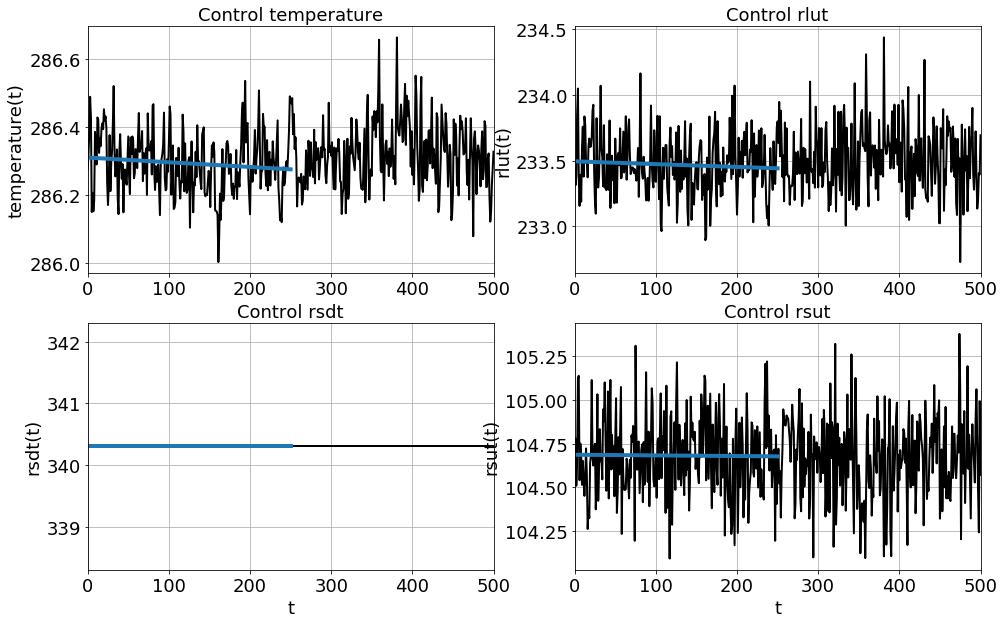

In [4]:
# plot control run data and linear trends

controlyears = np.arange(0,len(controltemp))
branchindex = control_branch_yr - int(controltimeperiod[0:4])
print(branchindex)


# create figure
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = [16,10])

# plot temperature
var = controltemp[:]; label = 'temperature'
ax[0,0].plot(controlyears,var,linewidth=2,color = "black")
# find linear fits to control T and nettoarad in the same period as historical + rcp:
p1 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controltemp[branchindex:(branchindex + len(temp))], deg = 1)
lintrendT = np.polyval(p1,controlyears[branchindex:(branchindex + len(temp))])
ax[0,0].plot(controlyears[branchindex:(branchindex + len(temp))], lintrendT, linewidth = 4)
ax[0,0].set_ylabel(label + '(t)',fontsize = 18)
ax[0,0].set_title('Control ' + label,fontsize = 18)
ax[0,0].grid()
ax[0,0].set_xlim(min(controlyears),max(controlyears))
ax[0,0].tick_params(axis='both',labelsize=18)

# plot rlut
var = controlrlut[:]; label = 'rlut'
ax[0,1].plot(controlyears,var,linewidth=2,color = "black")
p2 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrlut[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rlut = np.polyval(p2,controlyears[branchindex:(branchindex + len(temp))])
ax[0,1].plot(controlyears[branchindex:(branchindex + len(temp))], lintrend_rlut, linewidth = 4)
ax[0,1].set_ylabel(label + '(t)',fontsize = 18)
ax[0,1].set_title('Control ' + label,fontsize = 18)
ax[0,1].grid()
ax[0,1].set_xlim(min(controlyears),max(controlyears))
ax[0,1].tick_params(axis='both',labelsize=18)

# plot rsdt
var = controlrsdt[:]; label = 'rsdt'
ax[1,0].plot(controlyears,var,linewidth=2,color = "black")
p3 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrsdt[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rsdt = np.polyval(p3,controlyears[branchindex:(branchindex + len(temp))])
ax[1,0].plot(controlyears[branchindex:(branchindex + len(temp))], lintrend_rsdt, linewidth = 4)
ax[1,0].set_xlabel('t',fontsize = 18)
ax[1,0].set_ylabel(label + '(t)',fontsize = 18)
ax[1,0].set_title('Control ' + label,fontsize = 18)
ax[1,0].grid()
ax[1,0].set_xlim(min(controlyears),max(controlyears))
ax[1,0].set_ylim(var[0]-2,var[0]+2)
ax[1,0].tick_params(axis='both',labelsize=18)

# plot rsut
var = controlrsut[:]; label = 'rsut'
ax[1,1].plot(controlyears,var,linewidth=2,color = "black")
p4 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrsut[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rsut = np.polyval(p4,controlyears[branchindex:(branchindex + len(temp))])
ax[1,1].plot(controlyears[branchindex:(branchindex + len(temp))], lintrend_rsut, linewidth = 4)
ax[1,1].set_xlabel('t',fontsize = 18)
ax[1,1].set_ylabel(label + '(t)',fontsize = 18)
ax[1,1].set_title('Control ' + label,fontsize = 18)
ax[1,1].grid()
ax[1,1].set_xlim(min(controlyears),max(controlyears))
ax[1,1].tick_params(axis='both',labelsize=18)

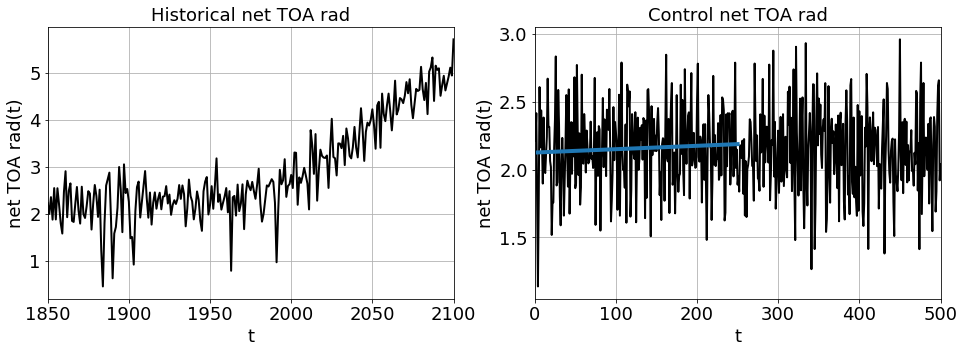

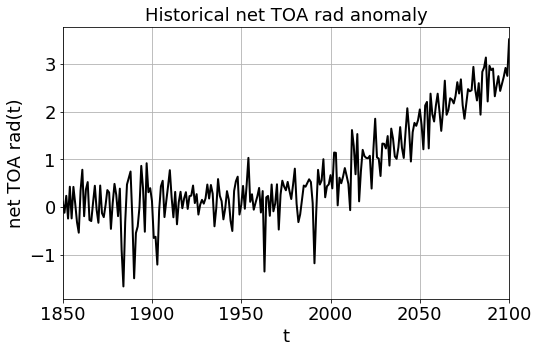

In [5]:
nettoarad = rsdt - rsut - rlut
controlnettoarad = controlrsdt - controlrsut - controlrlut
lintrendN = lintrend_rsdt - lintrend_rsut - lintrend_rlut

deltaN = nettoarad - lintrendN
deltaT = temp - lintrendT


# create figure
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = [16,5])

# plot historical and rcp8.5 net TOA rad
var = nettoarad[:]; label = 'net TOA rad'
ax[0,].plot(years,var,linewidth=2,color = "black")
ax[0,].set_xlabel('t',fontsize = 18)
ax[0,].set_ylabel(label + '(t)',fontsize = 18)
ax[0,].set_title('Historical ' + label,fontsize = 18)
ax[0,].grid()
ax[0,].set_xlim(min(years),max(years))
ax[0,].tick_params(axis='both',labelsize=18)

# plot control net TOA rad
var = controlnettoarad[:]; label = 'net TOA rad'
ax[1,].plot(controlyears,var,linewidth=2,color = "black")
ax[1,].plot(controlyears[branchindex:(branchindex + len(temp))],lintrendN,linewidth=4)
ax[1,].set_xlabel('t',fontsize = 18)
ax[1,].set_ylabel(label + '(t)',fontsize = 18)
ax[1,].set_title('Control ' + label,fontsize = 18)
ax[1,].grid()
ax[1,].set_xlim(min(controlyears),max(controlyears))
ax[1,].tick_params(axis='both',labelsize=18)



########### plot also anomalies: ########### 

# create figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = [8,5])

var = deltaN; label = 'net TOA rad'
ax.plot(years,var,linewidth=2,color = "black")
ax.set_xlabel('t',fontsize = 18)
ax.set_ylabel(label + '(t)',fontsize = 18)
ax.set_title('Historical ' + label + ' anomaly',fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.tick_params(axis='both',labelsize=18)

# write time series to a dataframe?
if storedata == True:
    dfT = pd.read_table(filenameT, index_col=0); dfN = pd.read_table(filenameN, index_col=0); # load files
    if model == 'HadGEM2-ES' and rcpexp == 'rcp60':
        dfT[model][(years[0] - 1850):-1] = deltaT; dfN[model][(years[0] - 1850):-1] = deltaN
    else:    
        dfT[model][(years[0] - 1850):] = deltaT; dfN[model][(years[0] - 1850):] = deltaN
    dfT.to_csv(filenameT, sep='\t'); dfN.to_csv(filenameN, sep='\t') # save files again


## Load my estimated parameters

1.108875012228765
Forcing in year 2095 is: 7.0869952581734035
Temperature change in year 2095 is: 3.991774586040025
Temperature change in year 2003 is: 0.7420364362371288


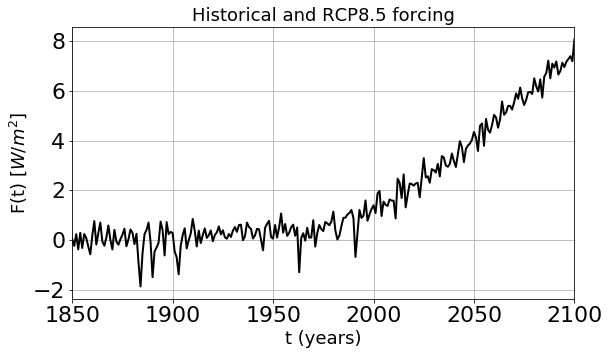

In [6]:
filename = 'best_estimated_parameters.txt'

parameter_table = pd.read_table(filename,index_col=0)
GregoryT2x = parameter_table.loc[model,'GregoryT2x']
GregoryF2x = parameter_table.loc[model,'GregoryF2x']
fbpar = GregoryF2x/GregoryT2x #feedback parameter from Gregory plot
print(fbpar)

F = deltaN + fbpar*deltaT

fig, ax = plt.subplots(figsize = [9,5]) 
plt.plot(years,F,linewidth=2,color = "black")
ax.set_xlabel('t (years)',fontsize = 18)
ax.set_ylabel('F(t) [$W/m^2$]',fontsize = 18)
ax.set_title('Historical and RCP8.5 forcing',fontsize = 18)
#ax.set_title('Historical and RCP6.0 forcing',fontsize = 18)
#ax.set_title('Historical and RCP4.5 forcing',fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.tick_params(axis='both',labelsize=22)  

print('Forcing in year 2095 is:', np.mean(np.array(F)[-10:-1]))
print('Temperature change in year 2095 is:', np.mean(np.array(deltaT)[-10:-1]))
print('Temperature change in year 2003 is:', np.mean(np.array(deltaT)[-100:-95]))

#plt.savefig('/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Papers/Forcingpaper/Figures/' + model + '_historicaland' + rcpexp + '_forsterforcing.pdf', transparent=True, format='pdf', dpi=600, bbox_inches="tight")

if storeforcingdata == True:
    dfFF = pd.read_table(filenameFF, index_col=0); # load files
    if model == 'HadGEM2-ES' and rcpexp == 'rcp60':
        dfFF[model][(years[0] - 1850):-1] = F;
    else:    
        dfFF[model][(years[0] - 1850):] = F;
    dfFF.to_csv(filenameFF, sep='\t');  # save file again



In [7]:
# load remaining parameters:
taulist = np.array(parameter_table.loc[model,'tau1':'tau3'])
a_n = np.array(parameter_table.loc[model,'a_1':'a_4'])
b_n = np.array(parameter_table.loc[model,'b_1':'b_4'])
F2x = parameter_table.loc[model,'F2x']
T2x = parameter_table.loc[model,'T2x']

# compute other needed parameters from these:
dim = len(taulist)

if any(a_n == 0):
    dim = np.count_nonzero(a_n[:dim])
    zeroindex = np.where(a_n == 0)[0]
    a_n = np.delete(a_n,zeroindex)
    b_n = np.delete(b_n,zeroindex)
    taulist = np.delete(taulist,zeroindex)
    
fbparlist = (b_n/a_n)[:dim]
print(fbparlist)
amplitudes = a_n[:dim]/(2*F2x*taulist)

print(np.sum(a_n)/2)
print(T2x)

[1.87032028 1.51817517 0.77623303]
3.1691523255472656
3.1691523255472656


In [8]:
# compute components T_n(t) = exp(-t/tau_n)*F(t) (Here * is a convolution)
dim = len(taulist)
lf = len(F)
predictors = np.full((lf,dim),np.nan)   

# compute exact predictors by integrating greens function
for k in range(0,dim):
    intgreensti = np.full((lf,lf),0.)   # remember dot after 0 to create floating point number array instead of integer
    for t in range(0,lf):
        # compute one new contribution to the matrix:
        intgreensti[t,0] = taulist[k]*(np.exp(-t/taulist[k]) - np.exp(-(t+1)/taulist[k]))
        
        # take the rest from row above:
        if t > 0:
            intgreensti[t,1:(t+1)] = intgreensti[t-1,0:t]
    # compute discretized convolution integral by this matrix product:
    predictors[:,k] = intgreensti@np.array(F)
    
Tn = amplitudes*predictors

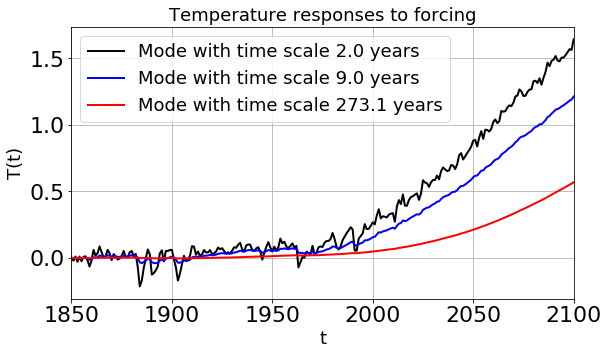

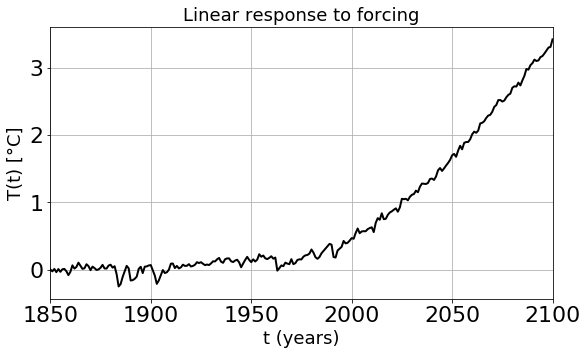

In [9]:
fig, ax = plt.subplots(figsize = [9,5]) 
plt.plot(years,Tn[:,0],linewidth=2,color = "black",label = 'Mode with time scale ' + str(np.round(taulist[0])) + ' years')
plt.plot(years,Tn[:,1],linewidth=2,color = "blue",label = 'Mode with time scale ' + str(np.round(taulist[1])) + ' years')
if dim>2:
    plt.plot(years,Tn[:,2],linewidth=2,color = "red",label = 'Mode with time scale ' + str(np.round(taulist[2],1)) + ' years')
ax.set_xlabel('t',fontsize = 18)
ax.set_ylabel('T(t)',fontsize = 18)
ax.set_title('Temperature responses to forcing',fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.tick_params(axis='both',labelsize=22)
ax.legend(loc=2, prop={'size': 18});

fig, ax = plt.subplots(figsize = [9,5]) 
plt.plot(years,np.sum(Tn, axis=1),linewidth=2,color = "black",label = 'Mode with time scale ' + str(np.round(taulist[0])) + ' years')
ax.set_xlabel('t (years)',fontsize = 18)
ax.set_ylabel('T(t) [°C]',fontsize = 18)
ax.set_title('Linear response to forcing',fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.tick_params(axis='both',labelsize=22)


#plt.savefig('/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Papers/Forcingpaper/Figures/' + model + '_historicaland' + rcpexp + '_linresptoforsterforcing.pdf', format='pdf', transparent=True, dpi=600, bbox_inches="tight")

Old 2095 forcing: 7.0869952581734035
New 2095 forcing: 9.071730166970703
2095 response to old forcing: 3.1966283636069517
2095 modelled temperature: 3.991774586040025
2095 response to new forcing: 4.097149362699815


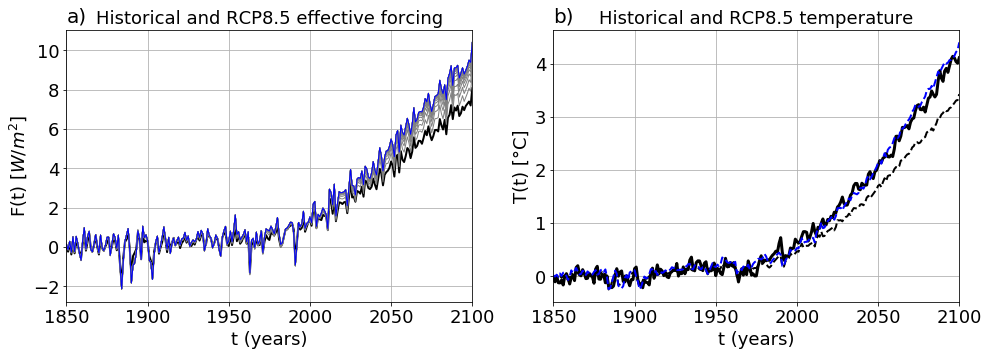

In [10]:
# Compute new estimate of forcing
it = 20  # number of iterations
Fiarray = np.full((lf,it),np.nan)  

Fi = F
for i in range(0,it):

    # iterate
    predictors = np.full((lf,dim),np.nan)   

    # compute exact predictors by integrating greens function
    for k in range(0,dim):
        intgreensti = np.full((lf,lf),0.)   # remember dot after 0 to create floating point number array instead of integer
        for t in range(0,lf):
            # compute one new contribution to the matrix:
            intgreensti[t,0] = taulist[k]*(np.exp(-t/taulist[k]) - np.exp(-(t+1)/taulist[k]))

            # take the rest from row above:
            if t > 0:
                intgreensti[t,1:(t+1)] = intgreensti[t-1,0:t]
        # compute discretized convolution integral by this matrix product:
        predictors[:,k] = intgreensti@np.array(Fi)

    Tni = amplitudes*predictors
    Fi = deltaN + Tni@fbparlist
    Fiarray[:,i] = Fi

fig, ax = plt.subplots(nrows=1,ncols=2,figsize = [16,5])
ax[0,].plot(years,F,linewidth=2,color = "black",label = "Old forcing")
for i in range(0,it-1):
    ax[0,].plot(years,Fiarray[:,i],linewidth=1,color = "gray")
ax[0,].plot(years,Fiarray[:,it-1],linewidth=1,color = "blue",label = "New forcing")
ax[0,].set_xlabel('t (years)',fontsize = 18)
ax[0,].set_ylabel('F(t) [$W/m^2$]',fontsize = 18)
ax[0,].grid()
ax[0,].set_xlim(min(years),max(years))
ax[0,].tick_params(axis='both',labelsize=18)  

# compare responses
label = 'temperature'
# plot temperature
ax[1,].plot(years,deltaT,linewidth=3,color = "black",label = model + " modelled response")

# plot response
ax[1,].plot(years,np.sum(Tn,axis=1),'--',linewidth=2,color = "black",label = "Linear response to old forcing")
ax[1,].plot(years,np.sum(Tni,axis=1),'--',linewidth=2,color = "blue",label = "Linear response to new forcing")
ax[1,].set_xlabel('t (years)',fontsize = 18)
ax[1,].set_ylabel('T(t) [°C]',fontsize = 18)
if rcpexp == 'rcp85':
    ax[1,].set_title('Historical and RCP8.5 ' + label,fontsize = 18)
    ax[0,].set_title('Historical and RCP8.5 effective forcing',fontsize = 18)
elif rcpexp == 'rcp60':
    ax[1,].set_title('Historical and RCP6.0 ' + label,fontsize = 18)
    ax[0,].set_title('Historical and RCP6.0 effective forcing',fontsize = 18)
elif rcpexp == 'rcp45':
    ax[1,].set_title('Historical and RCP4.5 ' + label,fontsize = 18)
    ax[0,].set_title('Historical and RCP4.5 effective forcing',fontsize = 18)
elif rcpexp == 'rcp26':
    ax[1,].set_title('Historical and RCP2.6 ' + label,fontsize = 18)
    ax[0,].set_title('Historical and RCP2.6 effective forcing',fontsize = 18)
ax[1,].grid()
ax[1,].set_xlim(min(years),max(years))
ax[1,].tick_params(axis='both',labelsize=18)

ax[0,].text(0,1.03,'a)',transform=ax[0,].transAxes, fontsize=20)
ax[1,].text(0,1.03,'b)',transform=ax[1,].transAxes, fontsize=20)

#plt.savefig('/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Papers/Forcingpaper/Figures/' + model + '_' + rcpexp +'_forcing_and_response.pdf', format='pdf', dpi=600, bbox_inches="tight")

print('Old 2095 forcing:', np.mean(np.array(F)[-10:-1]))
print('New 2095 forcing:', np.mean(Fiarray[-10:-1,it-1]))

print('2095 response to old forcing:', np.mean(np.sum(Tn,axis=1)[-10:-1]))
print('2095 modelled temperature:', np.mean(deltaT[-10:-1]))
print('2095 response to new forcing:', np.mean(np.sum(Tni,axis=1)[-10:-1]))

if storeforcingdata == True:
    dfNF = pd.read_table(filenameNF, index_col=0); dfNF = pd.read_table(filenameNF, index_col=0); # load files
    if model == 'HadGEM2-ES' and rcpexp == 'rcp60':
        dfNF[model][(years[0] - 1850):-1] = Fiarray[:,it-1];
    else:    
        dfNF[model][(years[0] - 1850):] = Fiarray[:,it-1];
    dfNF.to_csv(filenameNF, sep='\t');  # save file again

In [ ]:
# put results in pandas dataframe:
if rcpexp == 'rcp85':
    columnnames = ['rcp8.5_2095_forster', 'rcp8.5_2095_our'];
    columnnames2 = ['rcp8.5_2095_forster', 'rcp8.5_2095_modeled', 'rcp8.5_2095_our'];
elif rcpexp == 'rcp60':
    columnnames = ['rcp6.0_2095_forster', 'rcp6.0_2095_our'];
    columnnames2 = ['rcp6.0_2095_forster', 'rcp6.0_2095_modeled', 'rcp6.0_2095_our'];
elif rcpexp == 'rcp45':
    columnnames = ['rcp4.5_2095_forster', 'rcp4.5_2095_our'];
    columnnames2 = ['rcp4.5_2095_forster', 'rcp4.5_2095_modeled', 'rcp4.5_2095_our'];   
elif rcpexp == 'rcp26':
    columnnames = ['rcp2.6_2095_forster', 'rcp2.6_2095_our'];
    columnnames2 = ['rcp2.6_2095_forster', 'rcp2.6_2095_modeled', 'rcp2.6_2095_our'];   
    


# if file is not already created, create a new file to store the results in:
filename = 'estimated_forcing.txt'
#dataframe = pd.DataFrame([np.concatenate((np.mean(np.array(F)[-10:-1]), np.mean(Fiarray[-10:-1,it-1])), axis=None)], index = [model], columns=columnnames)
#dataframe.to_csv(filename, sep='\t')

filename2 = 'estimated_temperaturechange.txt'
#dataframe2 = pd.DataFrame([np.concatenate((np.mean(np.sum(Tn,axis=1)[-10:-1]), np.mean(deltaT[-10:-1]), np.mean(np.sum(Tni,axis=1)[-10:-1])), axis=None)], index = [model], columns=columnnames2)
#dataframe2.to_csv(filename2, sep='\t')



In [ ]:
# load existing dataframe, and append present result:

loaded_dataframe = pd.read_table(filename,index_col=0)
loaded_dataframe2 = pd.read_table(filename2,index_col=0)
#print(loaded_dataframe)
pd.set_option('display.expand_frame_repr', False)

if rcpexp == 'rcp85' and set(columnnames).issubset(loaded_dataframe.columns) == False: # if columns are not created yet:
    loaded_dataframe[columnnames[:]] = pd.DataFrame([['-','-']], index = loaded_dataframe.index)
    loaded_dataframe2[columnnames2[:]] = pd.DataFrame([['-','-','-']], index = loaded_dataframe2.index)
elif rcpexp == 'rcp60' and set(columnnames).issubset(loaded_dataframe.columns) == False: # if columns are not created yet
    #add the new columns
    loaded_dataframe[columnnames[:]] = pd.DataFrame([['-','-']], index = loaded_dataframe.index)
    loaded_dataframe2[columnnames2[:]] = pd.DataFrame([['-','-','-']], index = loaded_dataframe2.index)
elif rcpexp == 'rcp45' and set(columnnames).issubset(loaded_dataframe.columns) == False: # if columns are not created yet
    #add the new columns
    loaded_dataframe[columnnames[:]] = pd.DataFrame([['-','-']], index = loaded_dataframe.index)
    loaded_dataframe2[columnnames2[:]] = pd.DataFrame([['-','-','-']], index = loaded_dataframe2.index)
elif rcpexp == 'rcp26' and set(columnnames).issubset(loaded_dataframe.columns) == False: # if columns are not created yet
    #add the new columns
    loaded_dataframe[columnnames[:]] = pd.DataFrame([['-','-']], index = loaded_dataframe.index)
    loaded_dataframe2[columnnames2[:]] = pd.DataFrame([['-','-','-']], index = loaded_dataframe2.index)

    
    
    
if rcpexp == 'rcp85' and set(columnnames).issubset(loaded_dataframe.columns):    
    # fill numbers into table:
    loaded_dataframe.loc[model,columnnames] = [np.mean(np.array(F)[-10:-1]), np.mean(Fiarray[-10:-1,it-1])]
    loaded_dataframe2.loc[model,columnnames2] = [np.mean(np.sum(Tn,axis=1)[-10:-1]), np.mean(deltaT[-10:-1]), np.mean(np.sum(Tni,axis=1)[-10:-1])]
    #print(loaded_dataframe);    print(loaded_dataframe2)
elif rcpexp == 'rcp60' and set(columnnames).issubset(loaded_dataframe.columns):
    # fill numbers into table:
    if model == 'HadGEM2-ES':
        loaded_dataframe.loc[model,columnnames] = [np.mean(np.array(F)[-9:-1]), np.mean(Fiarray[-9:-1,it-1])] # for hadgem rcp60 only
        loaded_dataframe2.loc[model,columnnames2] = [np.mean(np.sum(Tn,axis=1)[-9:-1]), np.mean(deltaT[-9:-1]), np.mean(np.sum(Tni,axis=1)[-9:-1])] # for hadgem rcp60 only
    else:
        loaded_dataframe.loc[model,columnnames] = [np.mean(np.array(F)[-10:-1]), np.mean(Fiarray[-10:-1,it-1])]
        loaded_dataframe2.loc[model,columnnames2] = [np.mean(np.sum(Tn,axis=1)[-10:-1]), np.mean(deltaT[-10:-1]), np.mean(np.sum(Tni,axis=1)[-10:-1])]
    #print(loaded_dataframe);    print(loaded_dataframe2)
elif rcpexp == 'rcp45' and set(columnnames).issubset(loaded_dataframe.columns):
    # fill numbers into table:
    loaded_dataframe.loc[model,columnnames] = [np.mean(np.array(F)[-10:-1]), np.mean(Fiarray[-10:-1,it-1])]
    loaded_dataframe2.loc[model,columnnames2] = [np.mean(np.sum(Tn,axis=1)[-10:-1]), np.mean(deltaT[-10:-1]), np.mean(np.sum(Tni,axis=1)[-10:-1])]
    #print(loaded_dataframe);    print(loaded_dataframe2)
elif rcpexp == 'rcp26' and set(columnnames).issubset(loaded_dataframe.columns):
    # fill numbers into table:
    loaded_dataframe.loc[model,columnnames] = [np.mean(np.array(F)[-10:-1]), np.mean(Fiarray[-10:-1,it-1])]
    loaded_dataframe2.loc[model,columnnames2] = [np.mean(np.sum(Tn,axis=1)[-10:-1]), np.mean(deltaT[-10:-1]), np.mean(np.sum(Tni,axis=1)[-10:-1])]
    #print(loaded_dataframe);    print(loaded_dataframe2)



# write them to a file:
#loaded_dataframe.to_csv(filename, sep='\t')
#loaded_dataframe2.to_csv(filename2, sep='\t')



In [ ]:
loaded_dataframe

In [ ]:
loaded_dataframe2

In [ ]:
# if numbers for a model were created by a mistake, use this to remove them again:

remove = False
emptyarray = np.full((251, 1),'-')

if remove == True:
    loaded_dataframe.loc[model,columnnames] = ['-','-']
    loaded_dataframe2.loc[model,columnnames2] = ['-','-','-']
    # write them to a file:
    loaded_dataframe.to_csv(filename, sep='\t')
    loaded_dataframe2.to_csv(filename2, sep='\t')
    
    # remove new forcing time series
    dfNF = pd.read_table(filenameNF, index_col=0); # load files 
    dfNF[model] = emptyarray;
    dfNF.to_csv(filenameNF, sep='\t');  # save file again
    
    # remove forster forcing time series
    dfFF = pd.read_table(filenameFF, index_col=0); # load files
    dfFF[model] = emptyarray;
    dfFF.to_csv(filenameFF, sep='\t');  # save file again    
    
    # remove temperature and netTOA radiation time series
    dfT = pd.read_table(filenameT, index_col=0); dfN = pd.read_table(filenameN, index_col=0); # load files
    dfT[model] = emptyarray; dfN[model] = emptyarray
    dfT.to_csv(filenameT, sep='\t'); dfN.to_csv(filenameN, sep='\t') # save files again



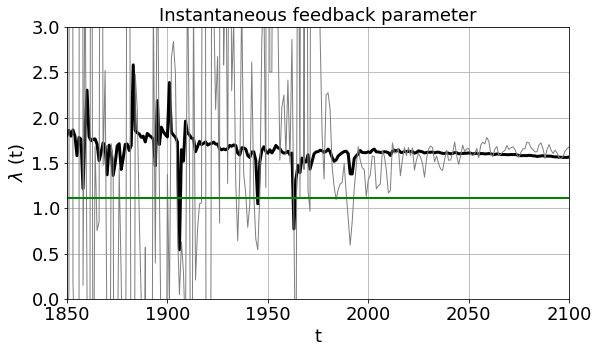

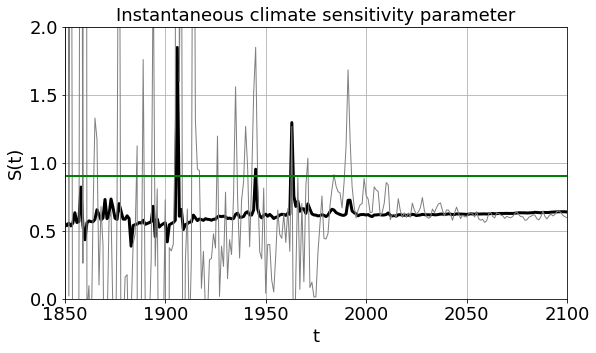

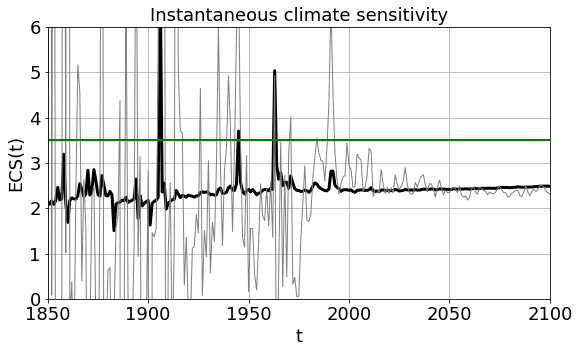

In [11]:
timedep_fbpar1 = Tni@fbparlist/np.sum(Tni,axis=1) # two alternative definitions
timedep_fbpar2 = Tni@fbparlist/deltaT

fig, ax = plt.subplots(figsize = [9,5])
label = 'Instantaneous feedback parameter'
# plot response
ax.plot(years,timedep_fbpar1,linewidth=3,color = "black")
ax.plot(years,timedep_fbpar2,linewidth=1,color = "gray")
ax.plot(years,np.full((len(years),1),fbpar),linewidth=2,color = "green")
ax.set_xlabel('t',fontsize = 18)
ax.set_ylabel('$\lambda$ (t)',fontsize = 18)
ax.set_title(label,fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.set_ylim(0,3)
ax.tick_params(axis='both',labelsize=18)

fig, ax = plt.subplots(figsize = [9,5])
label = 'Instantaneous climate sensitivity parameter'
# plot response
ax.plot(years,1/timedep_fbpar1,linewidth=3,color = "black")
ax.plot(years,1/timedep_fbpar2,linewidth=1,color = "gray")
ax.plot(years,np.full((len(years),1),1/fbpar),linewidth=2,color = "green")
ax.set_xlabel('t',fontsize = 18)
ax.set_ylabel('S(t)',fontsize = 18)
ax.set_title(label,fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.set_ylim(0,2)
ax.tick_params(axis='both',labelsize=18)

fig, ax = plt.subplots(figsize = [9,5])
label = 'Instantaneous climate sensitivity'
# plot response
ax.plot(years,F2x/timedep_fbpar1,linewidth=3,color = "black")
ax.plot(years,F2x/timedep_fbpar2,linewidth=1,color = "gray")
ax.plot(years,np.full((len(years),1),F2x/fbpar),linewidth=2,color = "green")
ax.set_xlabel('t',fontsize = 18)
ax.set_ylabel('ECS(t)',fontsize = 18)
ax.set_title(label,fontsize = 18)
ax.grid()
ax.set_xlim(min(years),max(years))
ax.set_ylim(0,6)
ax.tick_params(axis='both',labelsize=18)
